In [1]:
import pandas as pd 
import numpy as np
import random 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('C:/Users/LENOVO/Downloads/Indicators.csv')
data.shape

(5656458, 6)

this is really large dataset at least in term of the number of rows. but with 6 columns , what does this hold?

In [3]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


looks like it has different indicators for different countires with the year and value of the indicators 

# How many UNIQUE country names are there ?

In [4]:
countires =data ['CountryName'] . unique()  # tolist = convert data in list 
len(countires)

247

Are there same number of country codes?

In [5]:
# how many unique country codes are there ? (should be the same #)
countryCodes = data['CountryCode'].unique()
len(countryCodes)

247

Are there many indicators or few ?

In [6]:
# How many unique indicators are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

How many years of data do we have?

In [7]:
# how many years of data do we have ?
years = data['Year'].unique().tolist()
len(years)

56

What's the range of years?

In [8]:
print(str(min(years))+"to" +str(max(years)))

1960to2015


# Matplotlib : Basic plotting , part 1

Lets pick a country and an indicators to explore : CO2 Emission per capita and the USA

In [9]:
# select co2 emission for the united states 
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data ['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and co2 emission 
stage = data [mask1 & mask2]

In [10]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Lets see how emission have a changed over time using 
Matplotlib

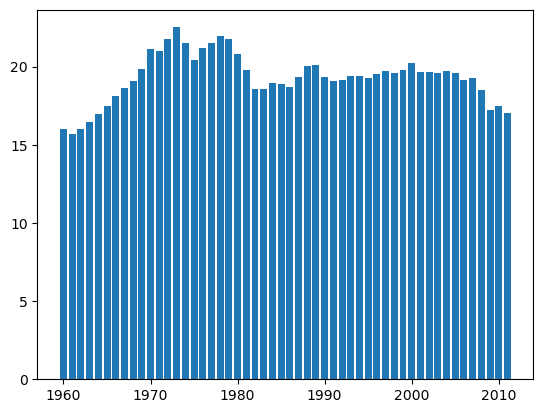

In [11]:
# get the years
years = stage['Year'].values
# get the values
co2=stage['Value'].values

# create 
plt.bar(years,co2)
plt.show()


Turns out emission per capita have dropped a bit over time,but let's make this graphic a bit more appealing before we continue to explore it.

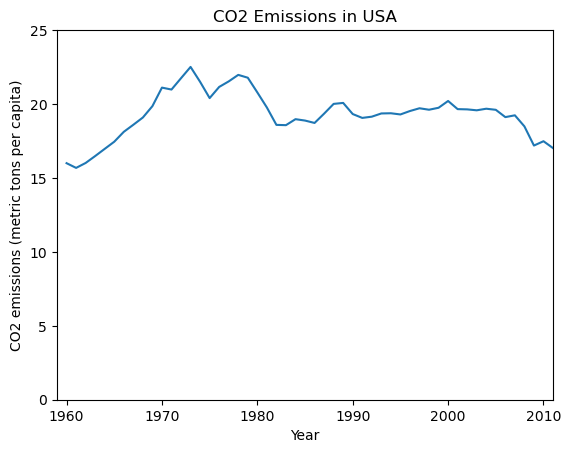

In [12]:
# switch to a line plot 
plt.plot(stage['Year'] . values,stage['Value'].values)

# label the axes 
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959,2011,0,25])
plt.show()

Using Histograms to explore the distribution of values

We could also visualize this data as a histrogram to better explore the ranges of values in CO2 production per year 

In [13]:
# if you want to just includes those within one standard deviation fo the mean ,you 
# lower = stage['Value'].mean()-stage['Value'].std()
# upper = stage ['Value'].mean()+stage['Value'].std()
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper
#otherwise , let's look at all the data 
hist_data =stage['Value'].values

In [14]:
print(len(hist_data))

52


<function matplotlib.pyplot.show(close=None, block=None)>

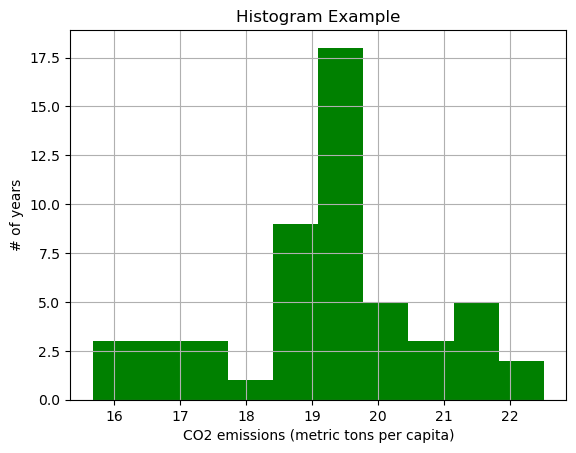

In [15]:
# the histogram of the data 
plt.hist(hist_data,10,density=False,facecolor='green')
# density = false means our width of bar will be same 
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of years')
plt.title('Histogram Example')

plt.grid(True)

plt.show

But how do the USA's numbers relate to those of other countires?

In [16]:
# select CO2 emission for all countries in 2011
hist_indicator= 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data ['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply our mask 
co2_2011  = data[mask1 &mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [17]:
print(len(co2_2011))

232


<function matplotlib.pyplot.show(close=None, block=None)>

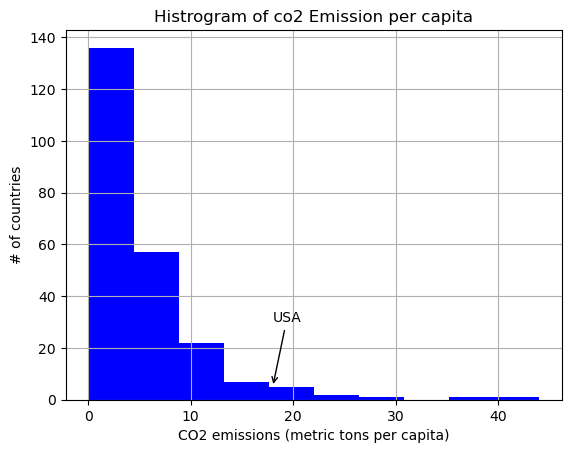

In [18]:
# let"s plot a histogram of the emission per capita by country 
# subplots return a touple with the figure , axis attributes
fig,ax = plt.subplots()

ax.annotate("USA",
           xy=(18,5), xycoords='data',
           xytext=(18,30),textcoords = 'data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )

plt.hist(co2_2011['Value'],facecolor='blue')
# density : width of your bins false will have all same size of bins.
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of countries')
plt.title('Histrogram of co2 Emission per capita')

# plt.axis ([10,22,0,14])
plt.grid(True)

plt.show

# Matplotlib: Basic Plotting , part 2 

Relationship between GDP and CO2 Emission in USA

In [20]:
# select GDP per capita emission for the united states
hist_indicator ='GDP per capita \(constant 2005'
hist_country = 'USA'

mask1=data['IndicatorName'].str.contains(hist_indicator)
mask2= data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emission 
gdp_stage = data [mask1 & mask2]

# plot gdp_stage vs stage 

In [21]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [22]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


<function matplotlib.pyplot.show(close=None, block=None)>

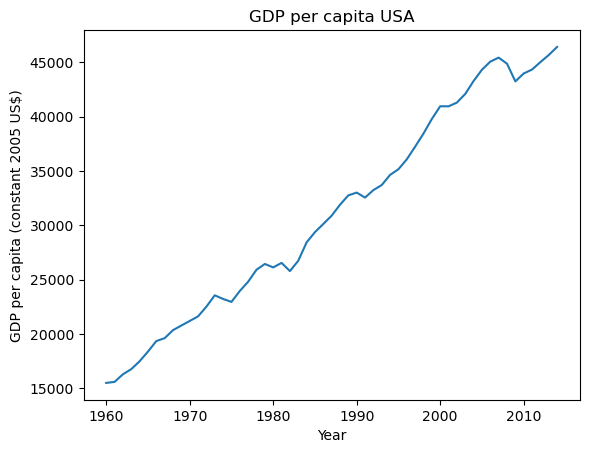

In [24]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)

# label the axes 
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# label the figaure 
plt.title('GDP per capita USA')

# to make more honest, start they y axis at 0
# plt.axis ([1959,2011,0,25])

plt.show

 Scatterplot for comparing GDP against CO2 emission (per capita)

In [28]:
print("GDP Min Year = ",gdp_stage['Year'].min(),"max: ",gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(),"max:",stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max: 2011


In [29]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


<function matplotlib.pyplot.show(close=None, block=None)>

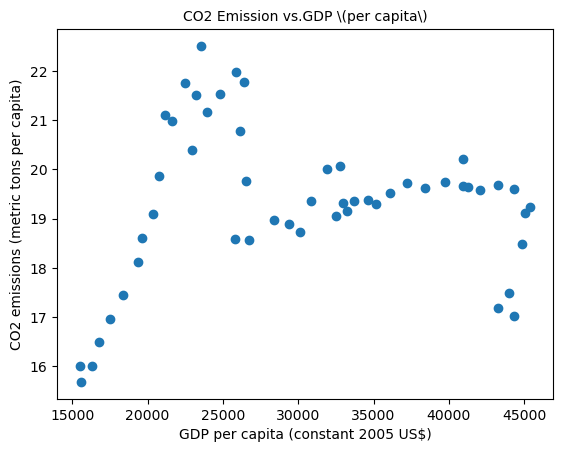

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig,axis = plt.subplots()
# grid lines,Xtricks , xlabel ,Ylabel

# axis.yaxis.grid(true)
axis.set_title('CO2 Emission vs.GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X=gdp_stage_trunc['Value'] #gdp usa
Y=stage['Value'] # co2 usa

axis.scatter(X,Y)
plt.show

In [32]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])